In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('Data/2011.csv', skiprows=1, low_memory=False)
df = df.drop(columns=['id', 'member_id'])
df =df[df.loan_status == 'Fully Paid']


In [3]:
df = df[['loan_amnt','int_rate','annual_inc', 'dti','emp_length', 'term', 'open_acc','revol_util']].dropna() 

df = df[:1000]
df.describe()

,loan_amnt,int_rate,annual_inc,dti,term,open_acc,revol_util
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,12842.725000,0.127820,63571.56046,14.423590,42.288000,9.449000,0.639130
std,7466.784738,0.037729,32596.40741,6.126887,10.558624,3.572977,0.232295
min,1000.000000,0.060000,12252.00000,0.720000,36.000000,2.000000,0.000000
25%,7143.750000,0.100000,40209.50000,10.000000,36.000000,7.000000,0.500000
50%,11850.000000,0.120000,55398.00000,14.430000,36.000000,9.000000,0.675000
75%,17000.000000,0.150000,80000.00000,19.122500,60.000000,12.000000,0.820000
max,35000.000000,0.240000,276000.00000,29.440000,60.000000,30.000000,1.000000


In [4]:
df['emp_length'] = df['emp_length'].replace(['10+ years', '< 1 year', '1 year', '2 years','3 years','4 years','5 years',\
                '6 years','7 years','8 years','9 years'], [10,.9,1,2,3,4,5,6,7,8,9])


In [5]:
df.head(5)

,loan_amnt,int_rate,annual_inc,dti,emp_length,term,open_acc,revol_util
0,5000,0.11,24000.0,27.65,10.0,36,3,0.84
2,2400,0.16,12252.0,8.72,10.0,36,2,0.99
3,10000,0.13,49200.0,20.00,10.0,36,10,0.21
4,3000,0.13,80000.0,17.94,1.0,60,15,0.54
5,5000,0.08,36000.0,11.20,3.0,36,9,0.28


In [6]:
df.dtypes

loan_amnt       int64
int_rate      float64
annual_inc    float64
dti           float64
emp_length    float64
term            int64
open_acc        int64
revol_util    float64
dtype: object

In [7]:
df = df.astype('float64', copy=False)

In [8]:
df.dtypes

loan_amnt     float64
int_rate      float64
annual_inc    float64
dti           float64
emp_length    float64
term          float64
open_acc      float64
revol_util    float64
dtype: object

In [9]:
target = df["int_rate"].values.reshape(-1,1)


In [10]:
# data = df[['loan_amnt','int_rate','annual_inc', 'dti']]
data = df.drop(['int_rate'], axis=1)
data.head()

,loan_amnt,annual_inc,dti,emp_length,term,open_acc,revol_util
0,5000.0,24000.0,27.65,10.0,36.0,3.0,0.84
2,2400.0,12252.0,8.72,10.0,36.0,2.0,0.99
3,10000.0,49200.0,20.00,10.0,36.0,10.0,0.21
4,3000.0,80000.0,17.94,1.0,60.0,15.0,0.54
5,5000.0,36000.0,11.20,3.0,36.0,9.0,0.28


In [11]:
print(data.shape, target.shape)

(1000, 7) (1000, 1)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [13]:
X_train[:1]

,loan_amnt,annual_inc,dti,emp_length,term,open_acc,revol_util
101,16000.0,65000.0,15.56,7.0,60.0,8.0,0.87


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.49701682487166643
Testing Score: 0.4776108098408635


In [16]:
model.predict([[5000.0,24000.0,27.65,10.0,36.0,3.0,0.84]])

array([[0.11300678]])

In [17]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0007569118469232355, R2: 0.4776108098408635


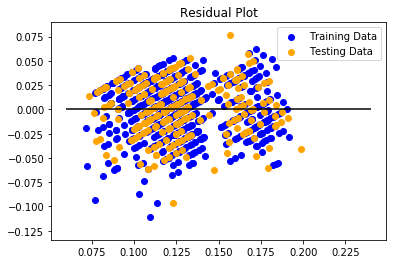

In [18]:
prediction = model.predict(X_test)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(prediction, prediction - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [19]:
import pickle


# save the model to disk
filename = 'model.h5'
pickle.dump(model, open(filename, 'wb'))

In [20]:
# Loading model to compare the results
model = pickle.load(open('model.h5','rb'))
print(model.predict([[5000.0,24000.0,27.65,10.0,36.0,3.0,0.84]]))

[[0.11300678]]
